In [6]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.4 MB/s eta 0:00:00


In [7]:
!pip install PyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=9c8b72a8bfa4522efeef7995d866fd71bddd96a523228d6af5423f55c48b28ba
  Stored in directory: /root/.cache/pip/wheels/6c/10/da/a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built PyDrive


In [8]:
# General-purpose imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote
import webbrowser
import random
from collections import defaultdict
from base64 import b64decode

# Scikit-learn imports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Input, GlobalAveragePooling2D, SeparableConv2D, Multiply
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2

# For AdamW optimizer (if available)
try:
    from tensorflow.keras.optimizers import AdamW
except ImportError:
    AdamW = Adam

# IPython displays
from IPython.display import display

# Kerastuner imports
from kerastuner.tuners import RandomSearch

# Google Colab imports
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [9]:
# Kaggle imports
import kagglehub

import zipfile
import os

# Path to your ZIP file in Google Drive
zip_path = "/content/drive/MyDrive/fer2013/fer2013.zip"

# Destination folder where contents will be extracted
extract_path = "/content/fer2013"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folders/files
print(os.listdir(extract_path))


['test', 'train']


Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Training class distribution:


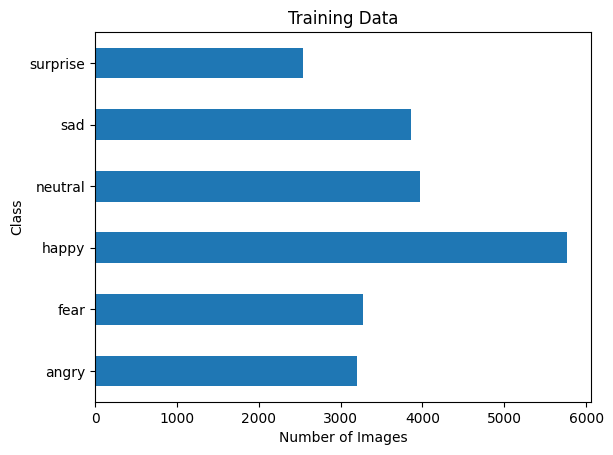

Validation class distribution:


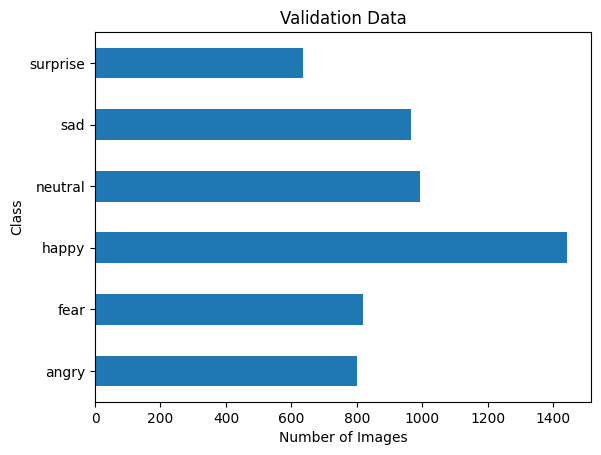

Test class distribution:


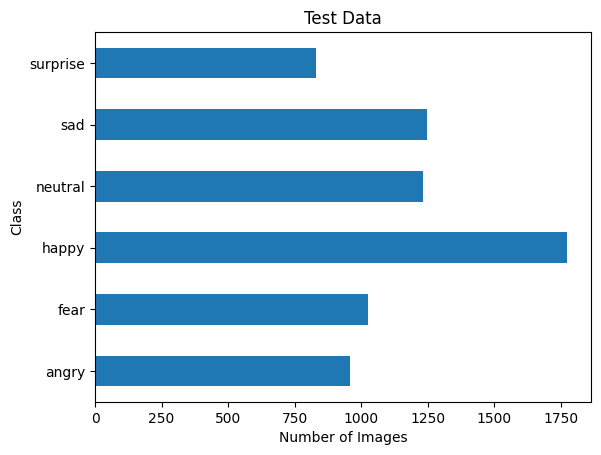

Building VGG16 with Attention Model...
Building DenseNet121 with Attention Model...
Building Custom Attention Model...

VGG16 with Attention Model Summary:


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_15 (Lambda)  │ (None, 48, 48, 3) │          0 │ input_layer_18[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 1, 1, 512) │ 14,714,688 │ lambda_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 64)        │     32,832 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 64)        │     32,832 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 512)       │     33,280 │ dense_53[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 512)       │     33,280 │ dense_55[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 512)       │          0 │ dense_54[0][0],   │
│                     │                   │            │ dense_56[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 512)       │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 1, 1, 512) │          0 │ activation_13[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_17         │ (None, 1, 1, 512) │          0 │ vgg16[0][0],      │
│ (Multiply)          │                   │            │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_16 (Lambda)  │ (None, 1, 1, 1)   │          0 │ multiply_17[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_17 (Lambda)  │ (None, 1, 1, 1)   │          0 │ multiply_17[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 1, 1, 2)   │          0 │ lambda_16[0][0],  │
│ (Concatenate)       │                   │            │ lambda_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 1, 1, 1)   │         99 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_18         │ (None, 1, 1, 512) │          0 │ multiply_17[0][0… │
│ (Multiply)          │                   │            │ conv2d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ multiply_18[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 16,039,209 (61.18 MB)

 Trainable params: 14,299,113 (54.55 MB)

 Non-trainable params: 1,740,096 (6.64 MB)


DenseNet121 with Attention Model Summary:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_18 (Lambda)  │ (None, 48, 48, 3) │          0 │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet121         │ (None, 1, 1,      │  7,037,504 │ lambda_18[0][0]   │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ densenet121[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 1024)      │          0 │ densenet121[0][0] │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 64)        │     65,600 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 64)        │     65,600 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 1024)      │     66,560 │ dense_61[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 1024)      │     66,560 │ dense_63[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 1024)      │          0 │ dense_62[0][0],   │
│                     │                   │            │ dense_64[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 1024)      │          0 │ add_5[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_10          │ (None, 1, 1,      │          0 │ activation_14[0]… │
│ (Reshape)           │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_19         │ (None, 1, 1,      │          0 │ densenet121[0][0… │
│ (Multiply)          │ 1024)             │            │ reshape_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_19 (Lambda)  │ (None, 1, 1, 1)   │          0 │ multiply_19[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_20 (Lambda)  │ (None, 1, 1, 1)   │          0 │ multiply_19[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 1, 1, 2)   │          0 │ lambda_19[0][0],  │
│ (Concatenate)       │                   │            │ lambda_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 1, 1, 1)   │         99 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_20         │ (None, 1, 1,      │          0 │ multiply_19[0][0… │
│ (Multiply)          │ 1024)             │            │ conv2d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ multiply_20[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 9,020,457 (34.41 MB)

 Trainable params: 3,577,449 (13.65 MB)

 Non-trainable params: 5,443,008 (20.76 MB)


Training vgg16_attention Model...
Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.1803 - loss: 2.5266
Epoch 1: val_accuracy improved from -inf to 0.22745, saving model to best_vgg16_attention_model.keras
354/354 ━━━━━━━━━━━━━━━━━━━━ 56s 122ms/step - accuracy: 0.1804 - loss: 2.5263 - val_accuracy: 0.2274 - val_loss: 2.0570 - learning_rate: 1.0000e-04
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2171 - loss: 2.2008
Epoch 2: val_accuracy improved from 0.22745 to 0.28794, saving model to best_vgg16_attention_model.keras
354/354 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.2171 - loss: 2.2007 - val_accuracy: 0.2879 - val_loss: 1.9017 - learning_rate: 1.0000e-04
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2568 - loss: 1.9906
Epoch 3: val_accuracy did not improve from 0.28794
354/354 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.2568 - loss: 1.9905 - val_accuracy: 0.2257 - val_loss: 2.1743 - learning_rate: 1.0000e-04


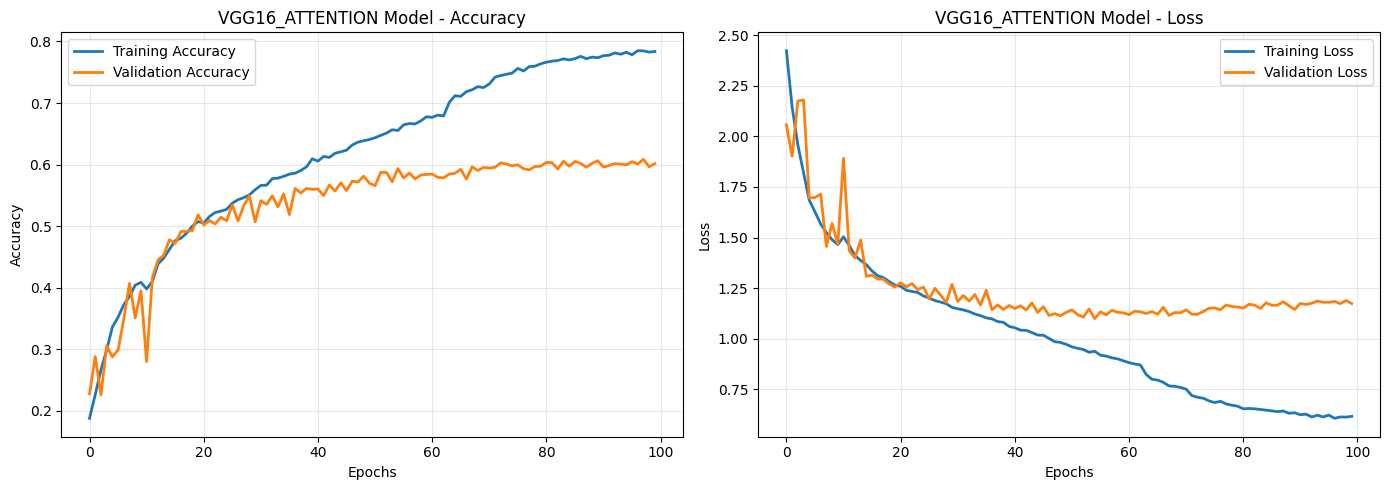

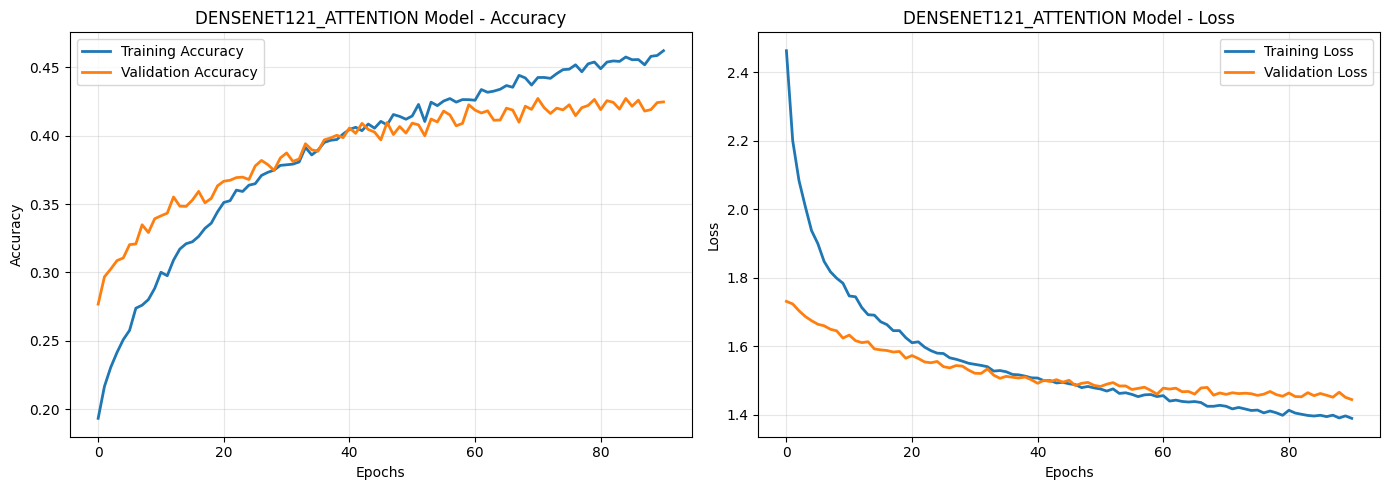

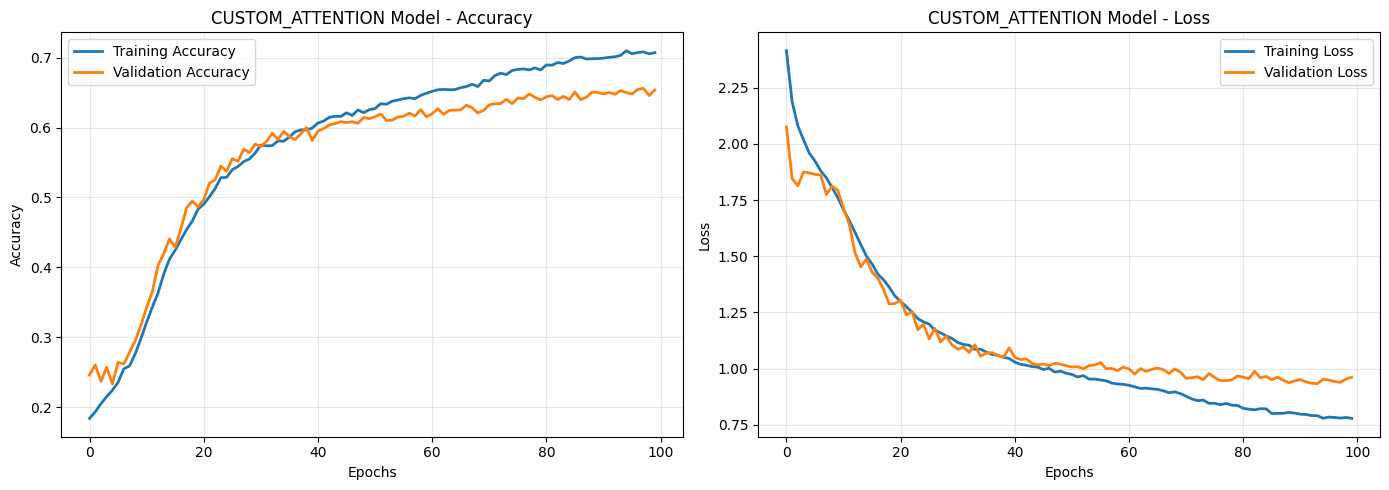


Evaluating Models...

Evaluating vgg16_attention Model...
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step
Classification Report for VGG16_ATTENTION
              precision    recall  f1-score   support

       angry       0.57      0.58      0.58       958
        fear       0.51      0.49      0.50      1024
       happy       0.85      0.84      0.84      1774
     neutral       0.56      0.64      0.60      1233
         sad       0.52      0.50      0.51      1247
    surprise       0.80      0.75      0.77       831

    accuracy                           0.65      7067
   macro avg       0.64      0.63      0.63      7067
weighted avg       0.65      0.65      0.65      7067



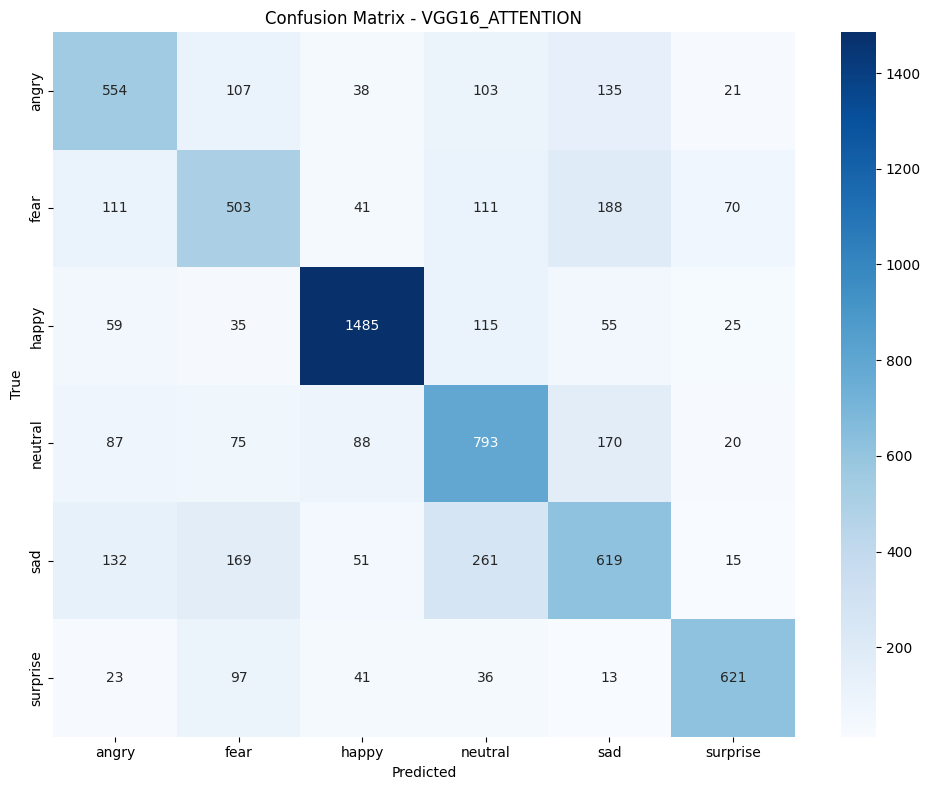

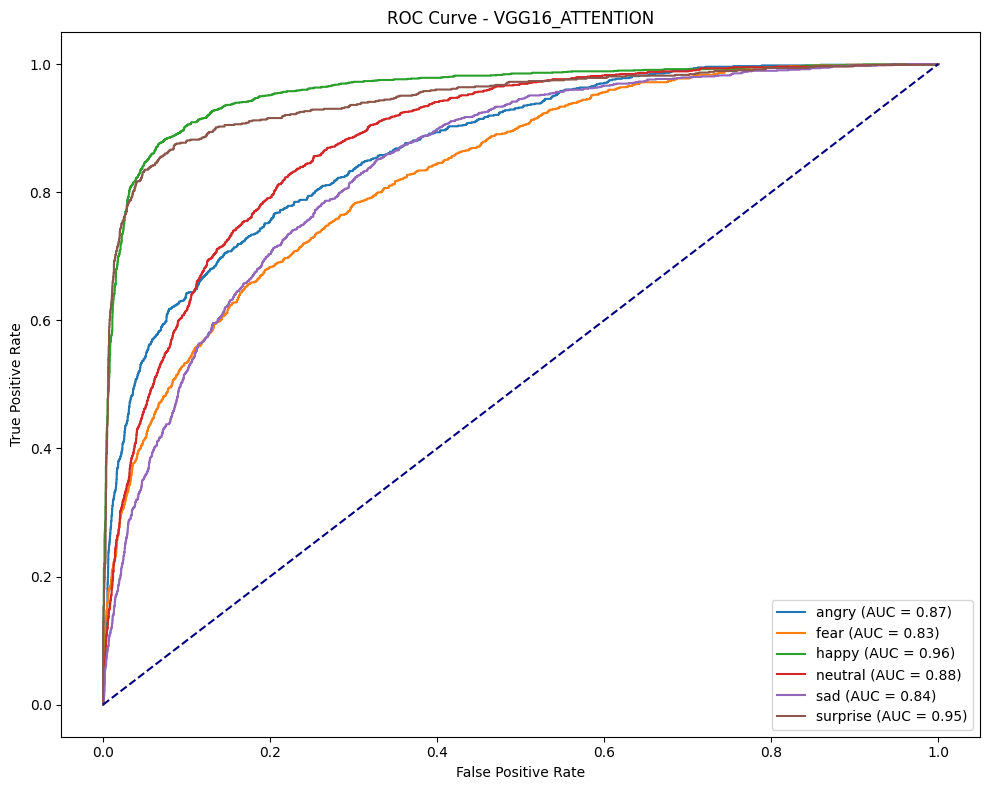

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


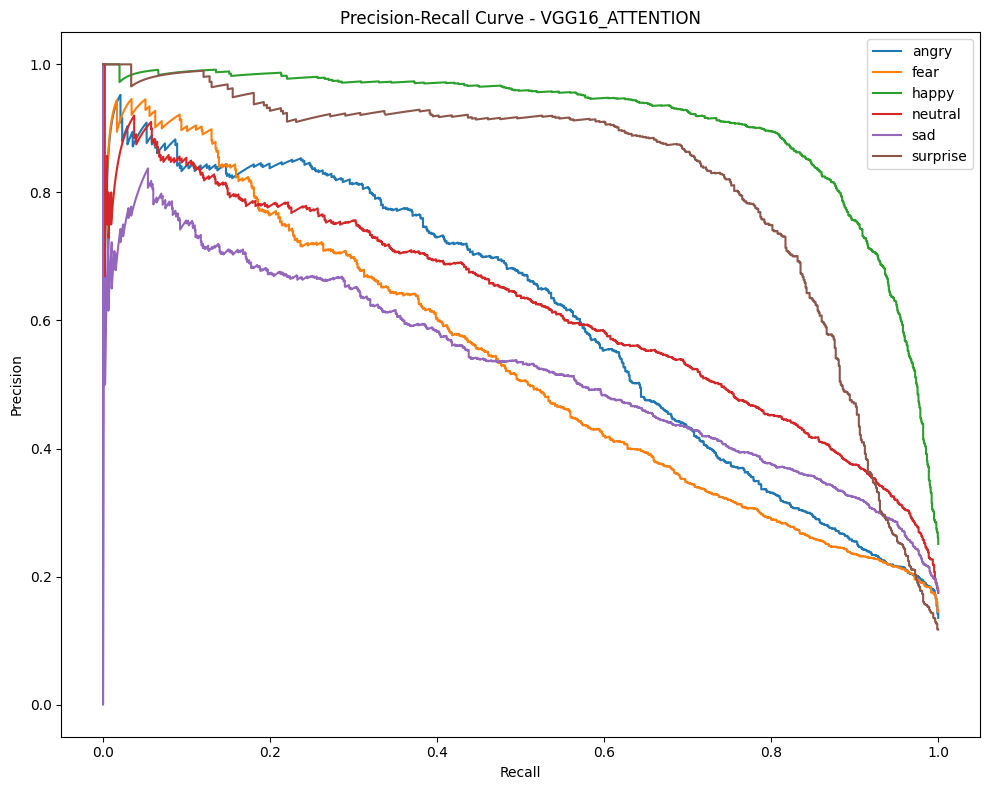

111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6228 - loss: 1.1690

Evaluating densenet121_attention Model...
111/111 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step
Classification Report for DENSENET121_ATTENTION
              precision    recall  f1-score   support

       angry       0.39      0.28      0.33       958
        fear       0.38      0.16      0.22      1024
       happy       0.51      0.76      0.61      1774
     neutral       0.40      0.48      0.44      1233
         sad       0.45      0.27      0.33      1247
    surprise       0.52      0.65      0.58       831

    accuracy                           0.46      7067
   macro avg       0.44      0.43      0.42      7067
weighted avg       0.45      0.46      0.43      7067



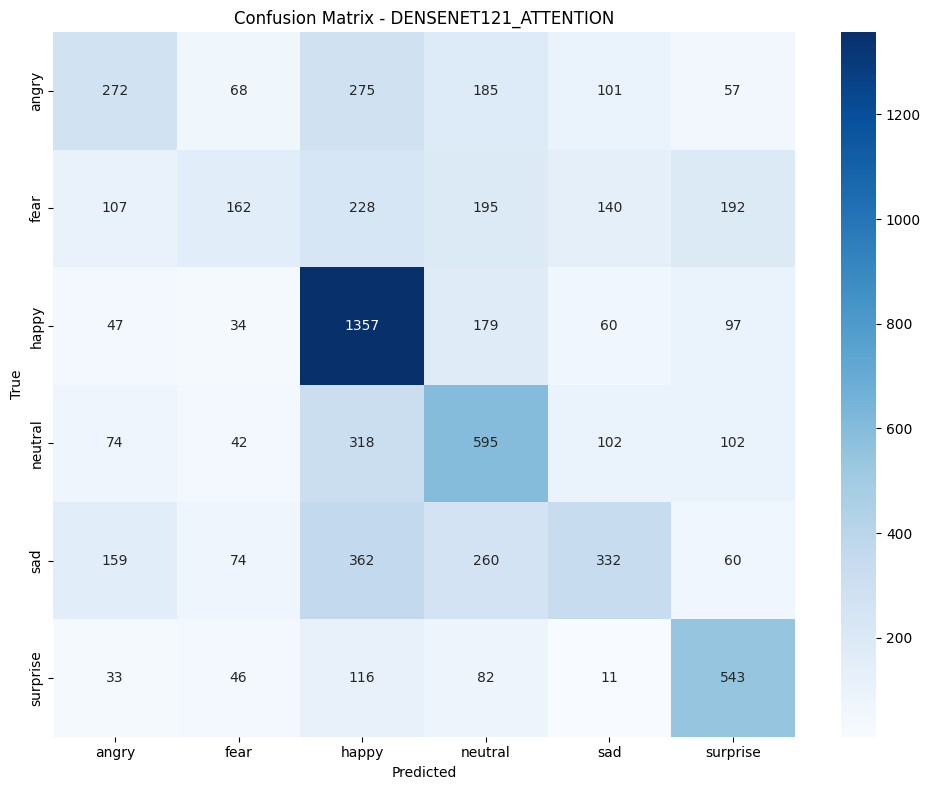

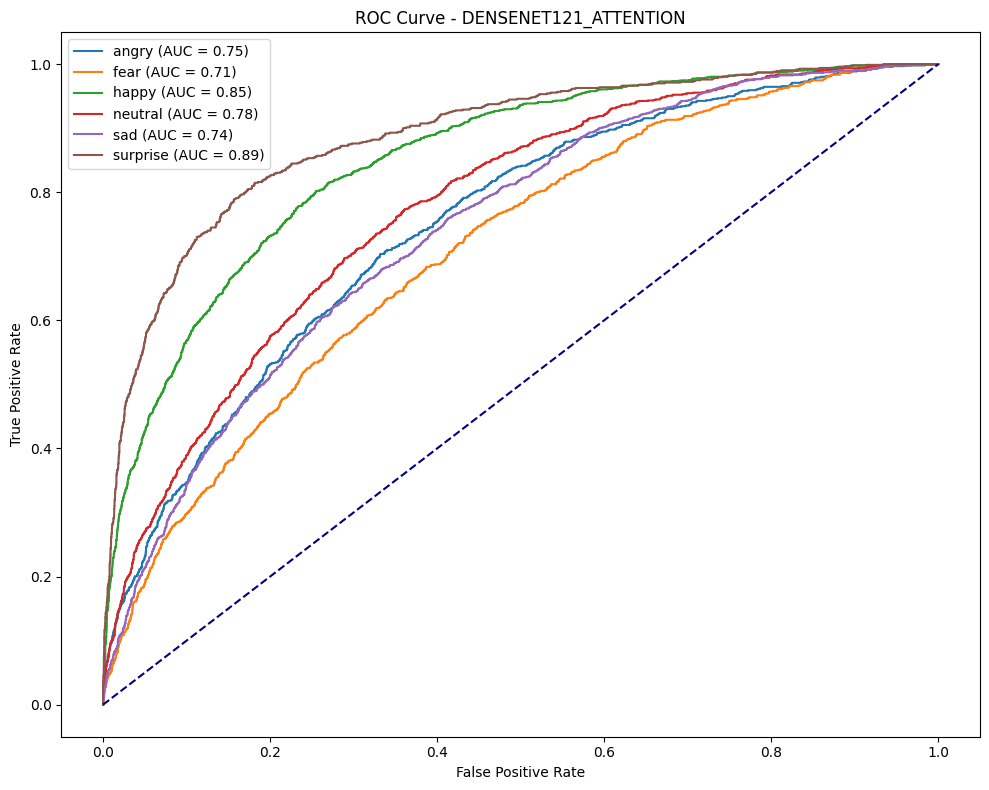

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


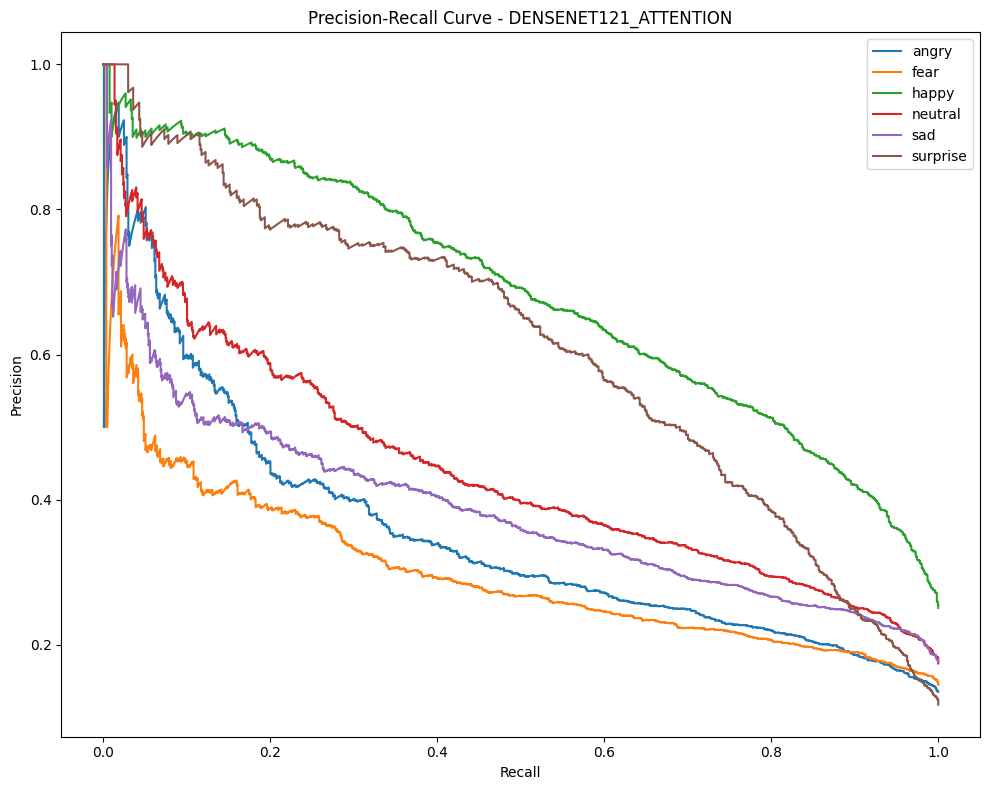

111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.3869 - loss: 1.5085

Evaluating custom_attention Model...
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step
Classification Report for CUSTOM_ATTENTION
              precision    recall  f1-score   support

       angry       0.62      0.63      0.62       958
        fear       0.59      0.39      0.47      1024
       happy       0.90      0.88      0.89      1774
     neutral       0.58      0.70      0.63      1233
         sad       0.56      0.57      0.57      1247
    surprise       0.76      0.83      0.79       831

    accuracy                           0.68      7067
   macro avg       0.67      0.67      0.66      7067
weighted avg       0.68      0.68      0.68      7067



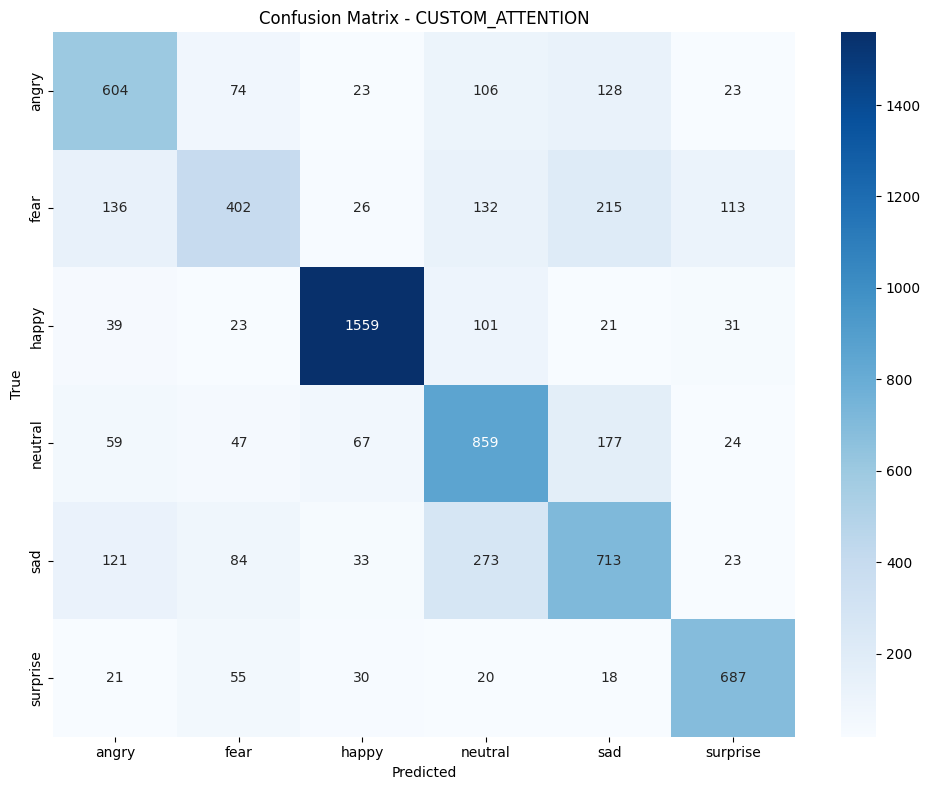

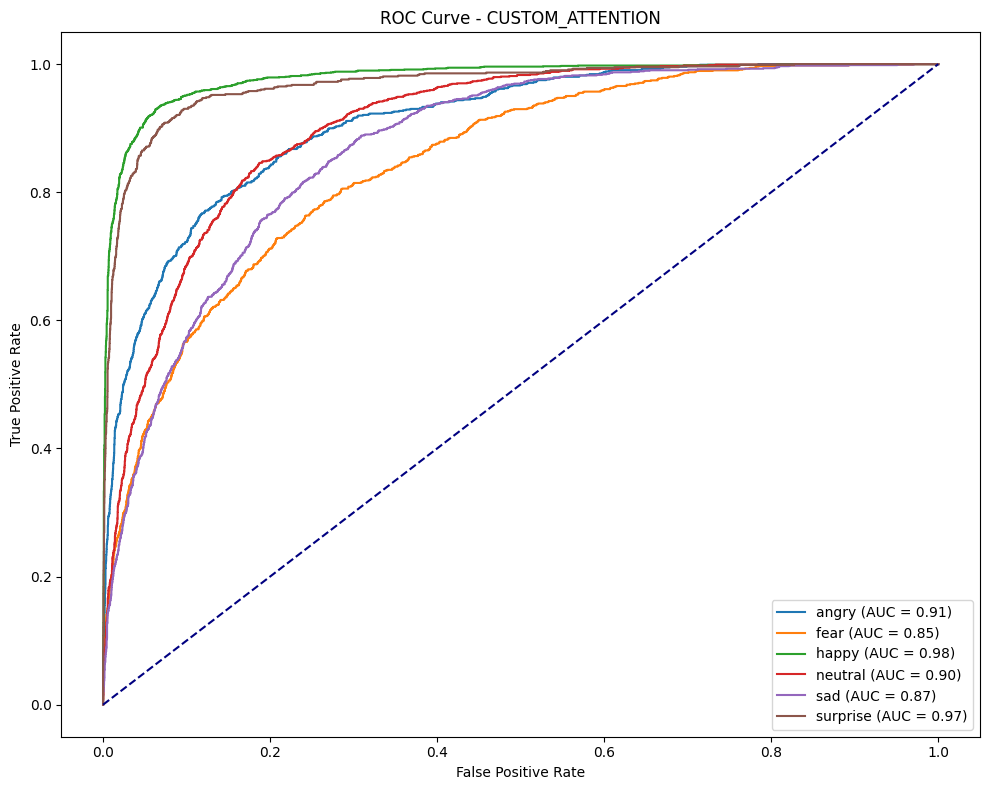

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


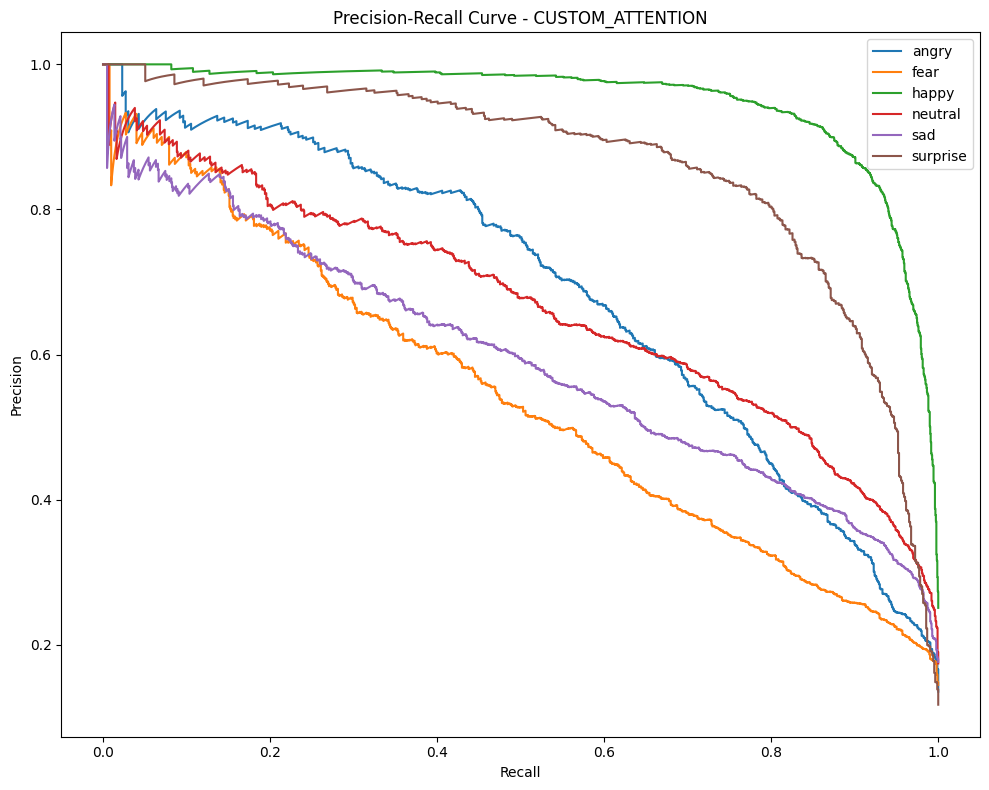

111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6391 - loss: 0.9794

MODEL PERFORMANCE COMPARISON
VGG16_ATTENTION           - Test Accuracy: 0.6474, Test Loss: 1.0963
DENSENET121_ATTENTION     - Test Accuracy: 0.4614, Test Loss: 1.3804
CUSTOM_ATTENTION          - Test Accuracy: 0.6826, Test Loss: 0.8913

🎯 BEST MODEL: CUSTOM_ATTENTION with accuracy: 0.6826

Saving models...
Saved: fer_vgg16_attention_model.keras
Saved: fer_densenet121_attention_model.keras
Saved: fer_custom_attention_model.keras
All models saved successfully!


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Multiply, Activation, Reshape, Permute, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# ---------------------------- Configurations ---------------------------- #
IMAGE_SIZE = 48
BATCH_SIZE = 64
EPOCHS = 100  # Increased epochs for better convergence

TRAIN_PATH = "/content/fer2013/train"
TEST_PATH = "/content/fer2013/test"
SELECTED_CLASSES = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# ---------------------------- Attention Mechanisms ---------------------------- #
def channel_attention(input_tensor, reduction_ratio=8):
    """Channel Attention Module (CAM)"""
    channels = input_tensor.shape[-1]

    # Global Average Pooling
    gap = GlobalAveragePooling2D()(input_tensor)
    gap = Dense(channels // reduction_ratio, activation='relu')(gap)
    gap = Dense(channels, activation='sigmoid')(gap)

    # Global Max Pooling
    gmp = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
    gmp = Dense(channels // reduction_ratio, activation='relu')(gmp)
    gmp = Dense(channels, activation='sigmoid')(gmp)

    # Combine both pooling methods
    attention = tf.keras.layers.Add()([gap, gmp])
    attention = Activation('sigmoid')(attention)

    # Reshape and multiply with input
    attention = Reshape((1, 1, channels))(attention)
    return Multiply()([input_tensor, attention])

def spatial_attention(input_tensor):
    """Spatial Attention Module (SAM)"""
    # Average and max pooling along channel axis
    avg_pool = tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=3, keepdims=True))(input_tensor)
    max_pool = tf.keras.layers.Lambda(lambda x: tf.reduce_max(x, axis=3, keepdims=True))(input_tensor)

    # Concatenate and apply convolution
    concat = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])
    attention = Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)

    return Multiply()([input_tensor, attention])

def cbam_attention(input_tensor, reduction_ratio=8):
    """Convolutional Block Attention Module (CBAM)"""
    # Channel attention first
    x = channel_attention(input_tensor, reduction_ratio)
    # Then spatial attention
    x = spatial_attention(x)
    return x

# ---------------------------- Utility Functions ---------------------------- #
def plot_class_distribution(generator, title):
    """Plot class distribution of a dataset."""
    class_counts = generator.classes
    class_labels = list(generator.class_indices.keys())
    counts = pd.Series(class_counts).value_counts(sort=False)
    counts.index = [class_labels[i] for i in counts.index]
    counts.plot(kind='barh', title=title)
    plt.xlabel('Number of Images')
    plt.ylabel('Class')
    plt.show()

# ---------------------------- Grayscale Data Generators ---------------------------- #
def create_grayscale_generators(train_path, test_path, img_size, batch_size, selected_classes):
    """Create grayscale data generators with enhanced augmentation."""
    train_preprocessor = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,  # Increased rotation
        zoom_range=0.3,     # Increased zoom
        width_shift_range=0.2,  # Increased shift
        height_shift_range=0.2,
        shear_range=0.15,   # Increased shear
        horizontal_flip=True,
        brightness_range=[0.7, 1.3],  # Wider brightness range
        fill_mode='nearest',
        validation_split=0.2
    )

    test_preprocessor = ImageDataGenerator(rescale=1./255)

    train_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode="categorical",
        subset="training",
        classes=selected_classes,
        shuffle=True
    )

    validation_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode="categorical",
        subset="validation",
        classes=selected_classes,
        shuffle=False
    )

    test_generator = test_preprocessor.flow_from_directory(
        test_path,
        target_size=(img_size, img_size),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=selected_classes
    )

    return train_generator, validation_generator, test_generator

# ---------------------------- Enhanced Model Building Functions ---------------------------- #
def build_vgg16_with_attention(input_shape, num_classes):
    """Build VGG16 model with CBAM attention mechanism."""
    # Create base model
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )

    # Create input for grayscale
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Convert grayscale to 3 channels
    x = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

    # Pass through VGG16
    x = base_model(x, training=False)

    # Add CBAM attention
    x = cbam_attention(x, reduction_ratio=8)

    # Enhanced classifier head
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)  # Increased dropout

    x = Dense(1024, activation='relu')(x)  # Increased units
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Fine-tuning strategy
    base_model.trainable = True
    # Freeze early layers, fine-tune later layers
    for layer in base_model.layers[:10]:
        layer.trainable = False

    return model

def build_densenet121_with_attention(input_shape, num_classes):
    """Build DenseNet121 model with CBAM attention mechanism."""
    # Create base model
    base_model = DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )

    # Create input for grayscale
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Convert grayscale to 3 channels
    x = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

    # Pass through DenseNet121
    x = base_model(x, training=False)

    # Add CBAM attention
    x = cbam_attention(x, reduction_ratio=16)

    # Enhanced classifier head
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)  # Increased dropout

    x = Dense(1024, activation='relu')(x)  # Increased units
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Fine-tuning: Unfreeze last 80 layers (more aggressive fine-tuning)
    base_model.trainable = True
    for layer in base_model.layers[:-80]:
        layer.trainable = False

    return model

def build_custom_attention_model(input_shape, num_classes):
    """Build custom CNN model with multiple attention mechanisms."""
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Initial conv layers
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # First attention block
    x = channel_attention(x, reduction_ratio=8)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Second attention block
    x = spatial_attention(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Third attention block with CBAM
    x = cbam_attention(x, reduction_ratio=16)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Classifier
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# ---------------------------- Enhanced Callbacks ---------------------------- #
def get_enhanced_callbacks(model_name):
    """Get enhanced callbacks for training."""
    checkpoint = ModelCheckpoint(
        f"best_{model_name}_model.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max',
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor="val_accuracy",
        patience=20,  # Increased patience
        restore_best_weights=True,
        mode='max',
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=8,  # Increased patience
        min_lr=1e-7,
        verbose=1
    )

    return [checkpoint, early_stopping, reduce_lr]

# ---------------------------- Model Evaluation ---------------------------- #
def evaluate_and_plot_metrics(model, generator, selected_classes, title):
    """Evaluate model and plot confusion matrix, ROC curve, and precision-recall curve."""
    predictions = model.predict(generator)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes

    print(f"Classification Report for {title}")
    print(classification_report(true_classes, pred_classes, target_names=selected_classes))

    # Confusion Matrix
    cm = confusion_matrix(true_classes, pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(true_binary[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------- PR Curve Plot ---------------------------- #
def plot_precision_recall_curve(generator, predictions, selected_classes, title):
    """Plot Precision-Recall curve for each class."""
    true_classes = generator.classes
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))

    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(true_binary[:, i], predictions[:, i])
        plt.plot(recall, precision, label=f'{class_name}')

    plt.title(f'Precision-Recall Curve - {title}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------- Training History Plot ---------------------------- #
def plot_training_history(history, title):
    """Plot training and validation accuracy and loss over epochs."""
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ---------------------------- Pipeline Execution ---------------------------- #
if __name__ == "__main__":
    # Use grayscale generators
    train_generator, validation_generator, test_generator = create_grayscale_generators(
        TRAIN_PATH, TEST_PATH, IMAGE_SIZE, BATCH_SIZE, SELECTED_CLASSES
    )

    # Print class distributions
    print("Training class distribution:")
    plot_class_distribution(train_generator, "Training Data")

    print("Validation class distribution:")
    plot_class_distribution(validation_generator, "Validation Data")

    print("Test class distribution:")
    plot_class_distribution(test_generator, "Test Data")

    # Build models with attention
    print("Building VGG16 with Attention Model...")
    vgg_attention_model = build_vgg16_with_attention((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    vgg_attention_model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    print("Building DenseNet121 with Attention Model...")
    densenet_attention_model = build_densenet121_with_attention((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    densenet_attention_model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    print("Building Custom Attention Model...")
    custom_attention_model = build_custom_attention_model((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    custom_attention_model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Print model summaries
    print("\nVGG16 with Attention Model Summary:")
    vgg_attention_model.summary()

    print("\nDenseNet121 with Attention Model Summary:")
    densenet_attention_model.summary()

    # Train models
    models = {
        'vgg16_attention': vgg_attention_model,
        'densenet121_attention': densenet_attention_model,
        'custom_attention': custom_attention_model
    }

    histories = {}

    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Training {name} Model...")
        print(f"{'='*50}")

        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=get_enhanced_callbacks(name),
            verbose=1
        )
        histories[name] = history

    # Plot training history for all models
    print("\nPlotting Training Histories...")
    for name, history in histories.items():
        plot_training_history(history, f"{name.upper()} Model")

    # Evaluate all models
    results = {}
    print("\nEvaluating Models...")
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Evaluating {name} Model...")
        print(f"{'='*50}")

        evaluate_and_plot_metrics(model, test_generator, SELECTED_CLASSES, name.upper())

        # Generate predictions and plot PR curve
        predictions = model.predict(test_generator)
        plot_precision_recall_curve(test_generator, predictions, SELECTED_CLASSES, name.upper())

        # Store results
        test_loss, test_acc = model.evaluate(test_generator)
        results[name] = {'accuracy': test_acc, 'loss': test_loss}

    # Compare model performances
    print("\n" + "="*60)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*60)
    for name, result in results.items():
        print(f"{name.upper():<25} - Test Accuracy: {result['accuracy']:.4f}, Test Loss: {result['loss']:.4f}")

    # Find best model
    best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
    print(f"\n🎯 BEST MODEL: {best_model_name.upper()} with accuracy: {results[best_model_name]['accuracy']:.4f}")

    # Save models
    print("\nSaving models...")
    for name, model in models.items():
        model.save(f'fer_{name}_model.keras')
        print(f"Saved: fer_{name}_model.keras")

    print("All models saved successfully!")